In [27]:
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth',None)

In [2]:
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-4-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-4-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-4-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-4-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-4-08,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.shape

(76014, 15)

In [4]:
columns_to_remove = ['mid','venue','batsman','bowler','striker','non-striker']
# df.drop(labels=columns_to_remove,axis =1,inplace = True)
# df.head()

In [5]:
df.drop(columns = columns_to_remove ,axis = 'columns', inplace = True)
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
df['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
#teams which are currently playing IPL
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 
                    'Rajasthan Royals','Mumbai Indians','Kings XI Punjab',
                    'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [9]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
df.shape

(53811, 9)

In [11]:
#removing data for first 5 overs for every match as for prediction we need atleast data for 5 overs i.e. greater than 5 overs
df = df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,18-4-08,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [12]:
df.shape

(40108, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [22]:
#converting the column:Date from string to datetime
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [25]:
df.info()#date        datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [28]:
#applying one hot encoding to catergorical features
encoded_df = pd.get_dummies(df,columns = ['bat_team','bowl_team'])
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
encoded_df.shape

(40108, 23)

In [33]:
#as this is a time series data so splitting of data will be based on time.
#Here,for training, I have taken all data before 2016
#     for testing, I have taken all data after 2017
# So here we will manually split the data into train and test and will not use train_test_split
X_train = encoded_df.drop('total',axis='columns')[encoded_df['date'].dt.year <=2016]
X_test = encoded_df.drop('total',axis = 'columns')[encoded_df['date'].dt.year >=2017]
y_train = encoded_df[encoded_df['date'].dt.year <=2016]['total']
y_test = encoded_df[encoded_df['date'].dt.year >=2017]['total']

In [35]:
#Removing the date column as it is not necessary now since we have already splitted the data into train and test based on date
X_train.drop('date',axis = 'columns',inplace =True)
X_test.drop('date',axis = 'columns',inplace = True)

#### Model building

#### Linear regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [39]:
# import pickle
# filename = 'first-innings-score-linear-model.pkl'
# pickle.dump(regressor,open(filename,'wb'))#file in writebytes mode

#### RIDGE regression

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [41]:
ridge = Ridge()
parameters = {
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [61]:
import pickle
filename = 'first-innings-score-linear-model.pkl'
pickle.dump(ridge_regressor,open(filename,'wb'))#file in writebytes mode

In [45]:
ridge_regressor.best_params_

{'alpha': 40}

In [46]:
ridge_regressor.best_score_

-328.4152792487923

In [47]:
prediction = ridge_regressor.predict(X_test)

<AxesSubplot:xlabel='total'>

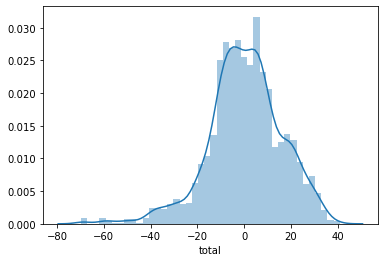

In [49]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [50]:
from sklearn import metrics
import numpy as np

In [52]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

MAE 12.11729452700503
MSE 251.03172964112676
RMSE 3.480990452012908


#### lasso regression

In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [54]:
print(ridge_regressor.best_params_)
ridge_regressor.best_score_

{'alpha': 40}


-328.4152792487923

In [58]:
prediction = lasso_regressor.predict(X_test)

<AxesSubplot:xlabel='total'>

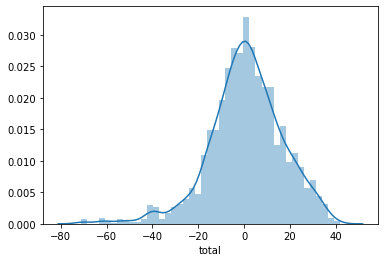

In [59]:
sns.distplot(y_test-prediction)

In [60]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

MAE 12.213583996827493
MSE 262.36538279606964
RMSE 3.4947938418206435
